# Project for the Principles of Data Analytics Module
****

## Palmer Penguins Dataset

Spring/Summer 2024

By Sadie Concannon
G00411297

This notebook contains my analysis of the famous palmer penguins dataset.


In [19]:
# for data frames
import pandas as pd
#Use seaborn library to access the penguins data set.
import seaborn as sns

#Loading the penguins data set.
penguins = sns.load_dataset('penguins')

# Importing the additional libraries as follows:
import numpy as np
import matplotlib.pyplot as plt #for plotting
import sys



# The Palmer Penguin dataset

The Palmer Penguin dataset contains data gathered by Dr. Kristen Gorman at the Palmer Station, Antartica between 2007 and 2009 $ ^{1}. It contains data for 344 penguins. There are three different species of penguins in this dataset (Adelie, Chinstrap and Gentoo), collected from three islands in the Palmer Archipelago, Antarctica. The dataset also includes information such as bill measurements, flipper measurements, body mass and sex. The dataset is often used for practicing classification algorithms and exploring data visualisation techniques.

![penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

****

## Inspect the Data Set.
****

In [20]:
# Show to see the data frame
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


We can see the data is tabular with each row corresponding to an observation. For each penguin we have a data point for its species, island, bill length, bill depth, flipper length, body mass and sex.

The numerical values for the lengths are in millimeters and in grams for the body mass.

In [21]:
# Look at first row.
penguins.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object

In [22]:
# Count the number of penguins of each sex.
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [23]:
# Describe the data set.
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [24]:
# Look for NaNs.
penguins.isna()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


(array([21., 35., 32., 34., 44., 55., 56., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <BarContainer object of 10 artists>)

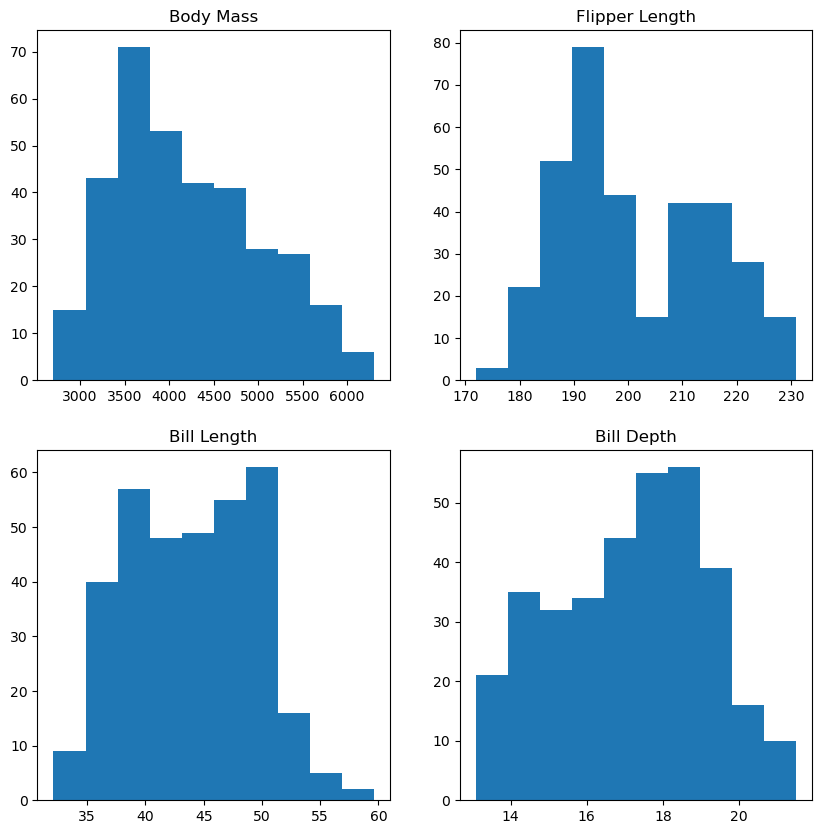

In [25]:
#start with a simple histogram amended to have 4 on one page
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Body Mass")
axes[0,0].hist(penguins['body_mass_g'], bins=10)

axes[0,1].set_title("Flipper Length")
axes[0,1].hist(penguins['flipper_length_mm'], bins=10) 

axes[1,0].set_title("Bill Length")
axes[1,0].hist(penguins['bill_length_mm'], bins=10)

axes[1,1].set_title("Bill Depth")
axes[1,1].hist(penguins['bill_depth_mm'], bins=10)
#plt.show()

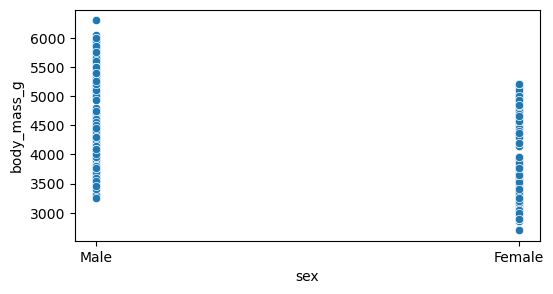

In [26]:
#scatterplot
f = plt.figure(figsize=(6,3))
fig = sns.scatterplot(x="sex", y="body_mass_g", data=penguins)

#### Pair Plot
****
A Pair plot visualises the data set of the determined variables to find the relationship between them. It combines the use of histograms and strip plots. In the example below I have selected four variables to compare using the command `vars` to specify them just for ease of visualisation given the large number of variable in my data set but these can all be plotted if desired and as shown in second pair plot below. I have added a regression line in red for ease of viewing.$ ^{2} $ 


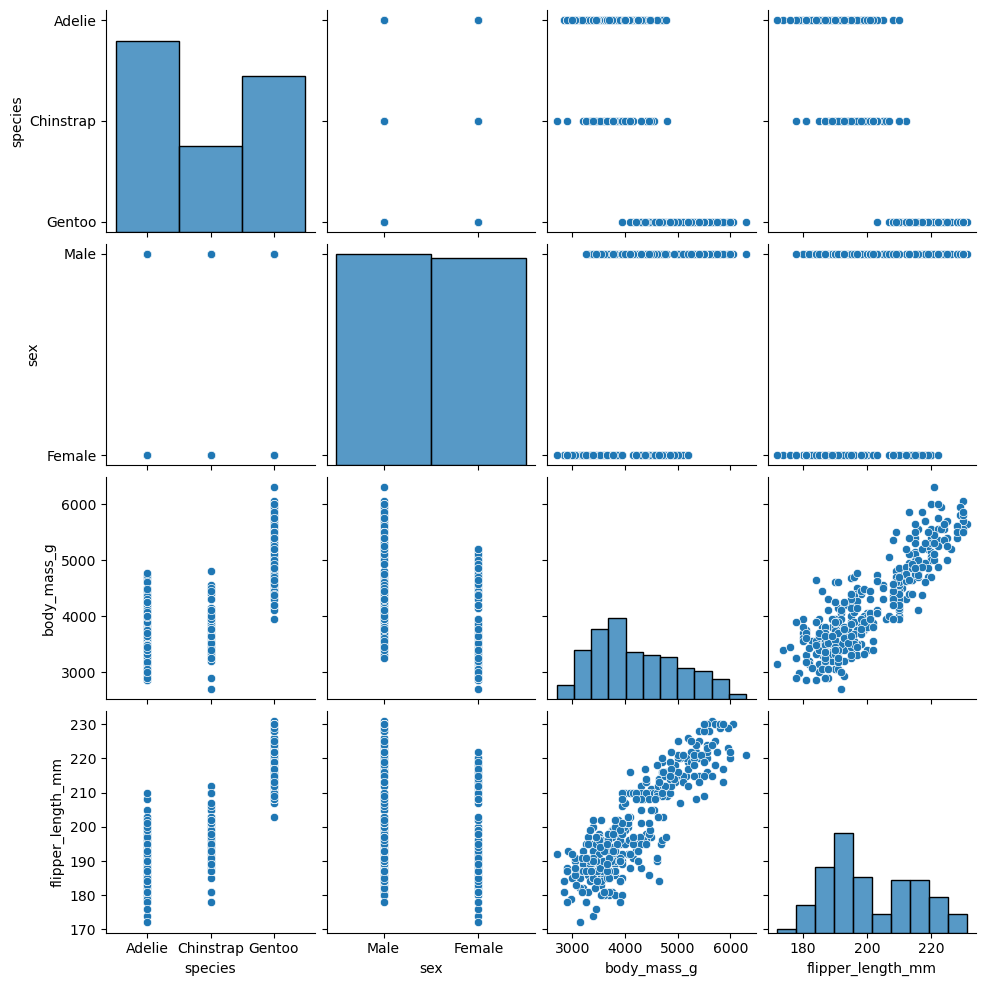

In [27]:
sns.pairplot(data=penguins, vars=['species', 'sex', 'body_mass_g', 'flipper_length_mm'])#, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

In [28]:
sns.pairplot(data=penguins, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

#### __References__
*****

1. https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis
2. https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22

****
# End